In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
import sys
sys.path.append('/capstor/users/cscs/xyixuan/PDM/')

In [4]:
from src.verbatim_eval.rouge_ttr import eval_rouge_ttr, batch_rouge_ttr_calc
from src.verbatim_eval.rouge_ttr import log_metric, log_metrics
from src.verbatim_eval.utils import load_inference_data
import numpy as np

/users/xyixuan/miniconda3/envs/lighteval/lib/python3.12/site-packages/ignite/handlers/checkpoint.py:16: DeprecationWarning: `TorchScript` support for functional optimizers is deprecated and will be removed in a future PyTorch release. Consider using the `torch.compile` optimizer instead.
  from torch.distributed.optim import ZeroRedundancyOptimizer
/users/xyixuan/miniconda3/envs/lighteval/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [5]:
base_path = "/iopsstor/scratch/cscs/xyixuan/experiment"
repetitions  = np.array([1, 2, 3, 4, 8, 16, 24, 32, 48, 64, 96, 128])
# repetitions = np.array([0, 128, 256, 512, 1024, 2048])

In [6]:
from ignite.metrics import RougeL
from typing import List
import numpy as np
from tqdm import tqdm

In [7]:
from src.verbatim_eval.controlled_expr import EvalConfig, eval_expr, format_metric_df, print_metrics

In [8]:
# For varying offsets
# config_offset = EvalConfig(
#     base_path="/iopsstor/scratch/cscs/xyixuan/experiment",
#     expr="llama_1.5B_Sparse_Gutenberg_Standard_GBS_60_SEQ_10200350",
#     repetitions=np.array([1, 2, 3, 4, 8, 16, 24, 32, 48, 64, 96, 128]),
#     policy="greedy",
#     vary_param='offset',
#     offsets=[0, 1, 2, 3, 4, 5, 10, 20, 30, 40, 50, 100],
#     fixed_prefix_length=500
# )

# For varying prefix lengths
config_prefix_at_offset0 = EvalConfig(
    base_path="/iopsstor/scratch/cscs/xyixuan/experiment",
    expr="llama_1.5B_Sparse_Gutenberg_Standard_GBS_60_SEQ_10200350",
    repetitions=np.array([1, 2, 3, 4, 8, 16, 24, 32, 48, 64, 96, 128]),
    policy="greedy",
    vary_param='prefix',
    prefix_lengths=[50, 100, 250, 500, 750, 1000, 1500, 2000, 3000, 4000, 5000],
    fixed_offset=0
)

config_prefix_at_offset50 = EvalConfig(
    base_path="/iopsstor/scratch/cscs/xyixuan/experiment",
    expr="llama_1.5B_Sparse_Gutenberg_Standard_GBS_60_SEQ_10200350",
    repetitions=np.array([1, 2, 3, 4, 8, 16, 24, 32, 48, 64, 96, 128]),
    policy="greedy",
    vary_param='prefix',
    prefix_lengths=[50, 100, 250, 500, 750, 1000, 1500, 2000, 3000, 4000, 5000],
    fixed_offset=50
)

config_prefix_at_offset100 = EvalConfig(
    base_path="/iopsstor/scratch/cscs/xyixuan/experiment",
    expr="llama_1.5B_Sparse_Gutenberg_Standard_GBS_60_SEQ_10200350",
    repetitions=np.array([1, 2, 3, 4, 8, 16, 24, 32, 48, 64, 96, 128]),
    policy="greedy",
    vary_param='prefix',
    prefix_lengths=[50, 100, 250, 500, 750, 1000, 1500, 2000, 3000, 4000, 5000],
    fixed_offset=100
)

In [9]:
results_prefix_at_offset0   = eval_expr(config_prefix_at_offset0)
results_prefix_at_offset50  = eval_expr(config_prefix_at_offset50)
results_prefix_at_offset100 = eval_expr(config_prefix_at_offset100)

Processing repetition 1:   0%|          | 0/12 [00:00<?, ?it/s]
Generating train split: 500 examples [00:00, 11169.03 examples/s]





Calculating metrics for rep=1, prefix=2000 (num_proc=100): 100%|██████████| 500/500 [00:00<00:00, 578.53 examples/s]

Generating train split: 500 examples [00:00, 9661.67 examples/s]






Calculating metrics for rep=1, prefix=3000 (num_proc=100): 100%|██████████| 500/500 [00:00<00:00, 525.45 examples/s] 


Generating train split: 500 examples [00:00, 1787.21 examples/s]






Calculating metrics for rep=1, prefix=4000 (num_proc=100): 100%|██████████| 500/500 [00:01<00:00, 486.48 examples/s] 

Generating train split: 500 examples [00:00, 6859.49 examples/s]





Calculating metrics for rep=1, prefix=5000 (num_proc=100): 100%|██████████| 500/500 [00:00<00:00, 605.58 examples/s]
Processing repetition 2:   8%|▊         | 1/12 [00:15<02:50, 15.54s/it]
Generating train split: 500 examples [00:00, 7982.52 examples/s]





Calculating metrics for rep=2, prefix

Processing repetition 128: 100%|██████████| 12/12 [01:38<00:00,  8.24s/it]


In [13]:
format_metric_df(results_prefix_at_offset0, metric='Rouge-L', vary_param='prefix').T

prefix_length,50,100,250,500,750,1000,1500,2000,3000,4000,5000
repetition,,,,,,,,,,,
1,0.164652,0.165612,0.171508,0.173,0.175572,0.173572,0.178052,0.174392,0.173396,0.173284,0.173416
2,0.169268,0.168524,0.17494,0.175724,0.174432,0.177404,0.174248,0.174744,0.171512,0.17646,0.176516
3,0.164236,0.166424,0.171452,0.171396,0.17452,0.174276,0.175816,0.172172,0.171452,0.172972,0.173724
4,0.16198,0.168228,0.174616,0.174156,0.177568,0.176212,0.177916,0.174716,0.178588,0.17658,0.176152
8,0.166636,0.1713,0.174776,0.175176,0.176196,0.175104,0.178396,0.177464,0.17704,0.178504,0.177556
16,0.171248,0.172096,0.175484,0.18096,0.183492,0.17984,0.181076,0.183712,0.184184,0.182444,0.182704
24,0.180036,0.183828,0.189044,0.194432,0.1994,0.198432,0.197428,0.198204,0.2011,0.2009,0.200432
32,0.20756,0.22576,0.23658,0.253136,0.268664,0.266052,0.269332,0.269188,0.266172,0.25922,0.266784
48,0.441856,0.470116,0.495032,0.528552,0.541652,0.546924,0.54592,0.540008,0.500568,0.501144,0.48424


In [ ]:
format_metric_df(results_prefix_at_offset50, metric='Rouge-L', vary_param='prefix').T

prefix_length,50,100,250,500,750,1000,1500,2000,3000,4000,5000
repetition,,,,,,,,,,,
1,0.162836,0.167544,0.172272,0.170896,0.172364,0.172324,0.174344,0.173408,0.17512,0.173264,0.178912
2,0.165872,0.170264,0.172536,0.172332,0.173256,0.175528,0.17484,0.176504,0.171548,0.176204,0.176504
3,0.161236,0.166536,0.169636,0.171604,0.1731,0.175876,0.175676,0.172772,0.172136,0.173772,0.175284
4,0.16486,0.17118,0.173228,0.173956,0.177736,0.173848,0.177348,0.17784,0.17794,0.175124,0.175232
8,0.16426,0.168952,0.172984,0.176284,0.17346,0.17484,0.177344,0.178152,0.177676,0.17814,0.17756
16,0.166084,0.170788,0.177736,0.18012,0.181964,0.178168,0.180452,0.182784,0.181644,0.182088,0.183088
24,0.166612,0.173052,0.182172,0.191088,0.197824,0.193972,0.197916,0.197636,0.197736,0.197776,0.197584
32,0.169076,0.177684,0.191392,0.216516,0.229996,0.230932,0.2527,0.246064,0.251744,0.249652,0.253772
48,0.171564,0.181464,0.229484,0.31034,0.36384,0.394856,0.41392,0.428288,0.411416,0.420228,0.415508


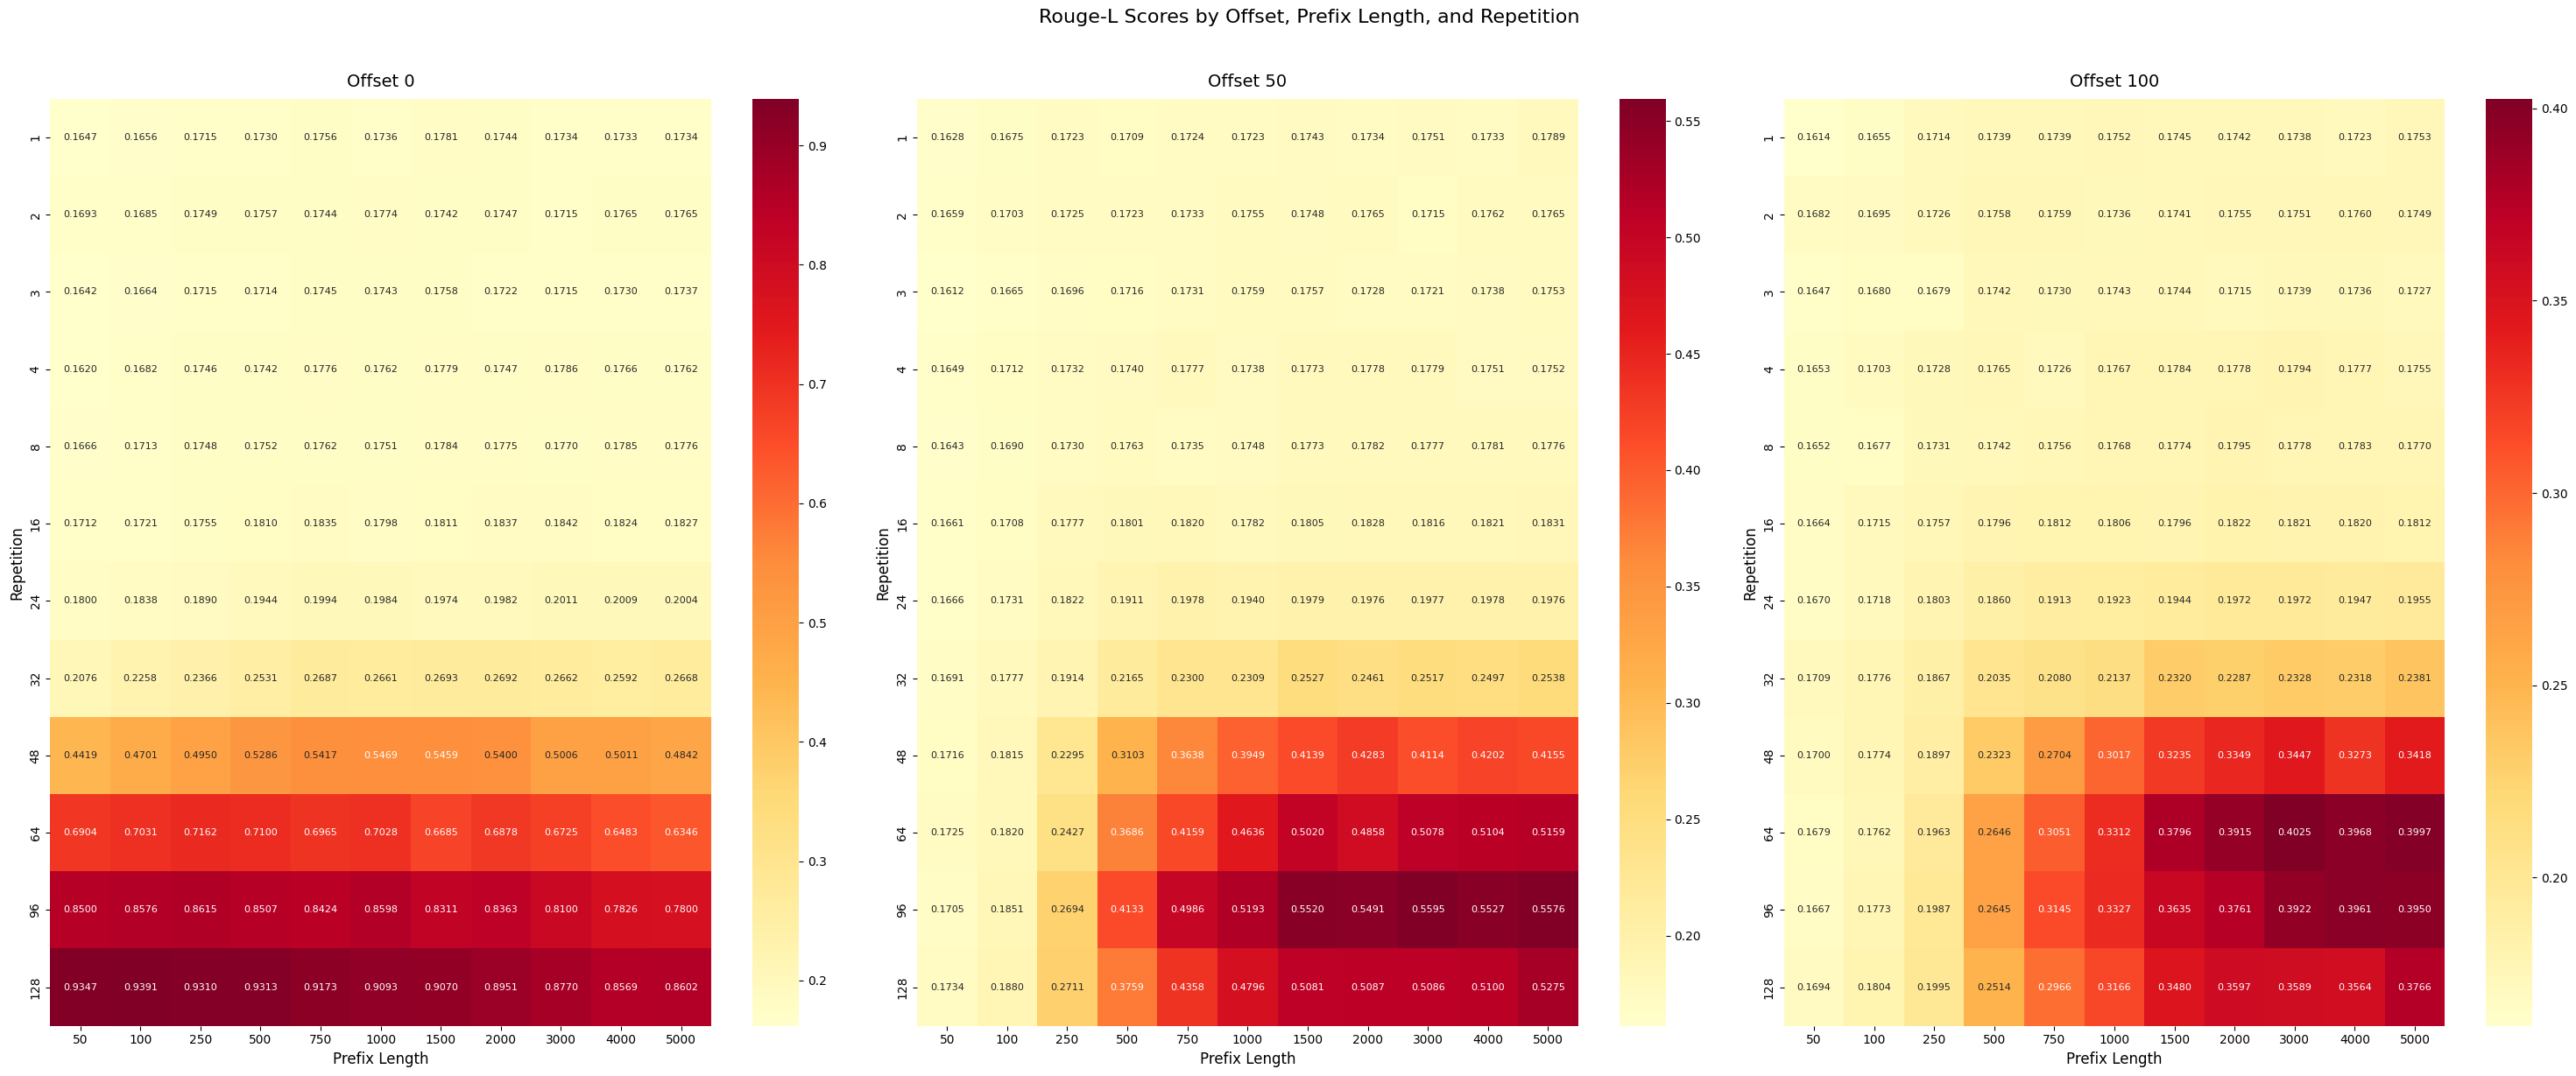

In [27]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

def create_heatmaps_subplots(offset0_data, offset50_data, offset100_data, prefix_lengths, repetitions, figsize=(30, 12)):
    fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=figsize)
    fig.suptitle('Rouge-L Scores by Offset, Prefix Length, and Repetition', fontsize=16, y=1.02)
    
    # Convert to numpy arrays and ensure float type
    data0 = offset0_data.astype(float).to_numpy()
    data50 = offset50_data.astype(float).to_numpy()
    data100 = offset100_data.astype(float).to_numpy()
    
    # Plot heatmaps with increased font size
    sns.heatmap(data0, annot=True, fmt='.4f', cmap='YlOrRd', ax=ax1, 
                xticklabels=prefix_lengths, yticklabels=repetitions,
                annot_kws={'size': 8})
    ax1.set_title('Offset 0', fontsize=14, pad=10)
    ax1.set_xlabel('Prefix Length', fontsize=12)
    ax1.set_ylabel('Repetition', fontsize=12)
    
    sns.heatmap(data50, annot=True, fmt='.4f', cmap='YlOrRd', ax=ax2,
                xticklabels=prefix_lengths, yticklabels=repetitions,
                annot_kws={'size': 8})
    ax2.set_title('Offset 50', fontsize=14, pad=10)
    ax2.set_xlabel('Prefix Length', fontsize=12)
    ax2.set_ylabel('Repetition', fontsize=12)
    
    sns.heatmap(data100, annot=True, fmt='.4f', cmap='YlOrRd', ax=ax3,
                xticklabels=prefix_lengths, yticklabels=repetitions,
                annot_kws={'size': 8})
    ax3.set_title('Offset 100', fontsize=14, pad=10)
    ax3.set_xlabel('Prefix Length', fontsize=12)
    ax3.set_ylabel('Repetition', fontsize=12)
    
    plt.tight_layout()
    return fig

# Data setup
prefix_lengths = [50, 100, 250, 500, 750, 1000, 1500, 2000, 3000, 4000, 5000]
repetitions = [1, 2, 3, 4, 8, 16, 24, 32, 48, 64, 96, 128]

# Create dataframes and plot
offset0_data = format_metric_df(results_prefix_at_offset0, metric='Rouge-L', vary_param='prefix').T
offset50_data = format_metric_df(results_prefix_at_offset50, metric='Rouge-L', vary_param='prefix').T
offset100_data = format_metric_df(results_prefix_at_offset100, metric='Rouge-L', vary_param='prefix').T

fig = create_heatmaps_subplots(offset0_data, offset50_data, offset100_data, prefix_lengths, repetitions)
plt.show()

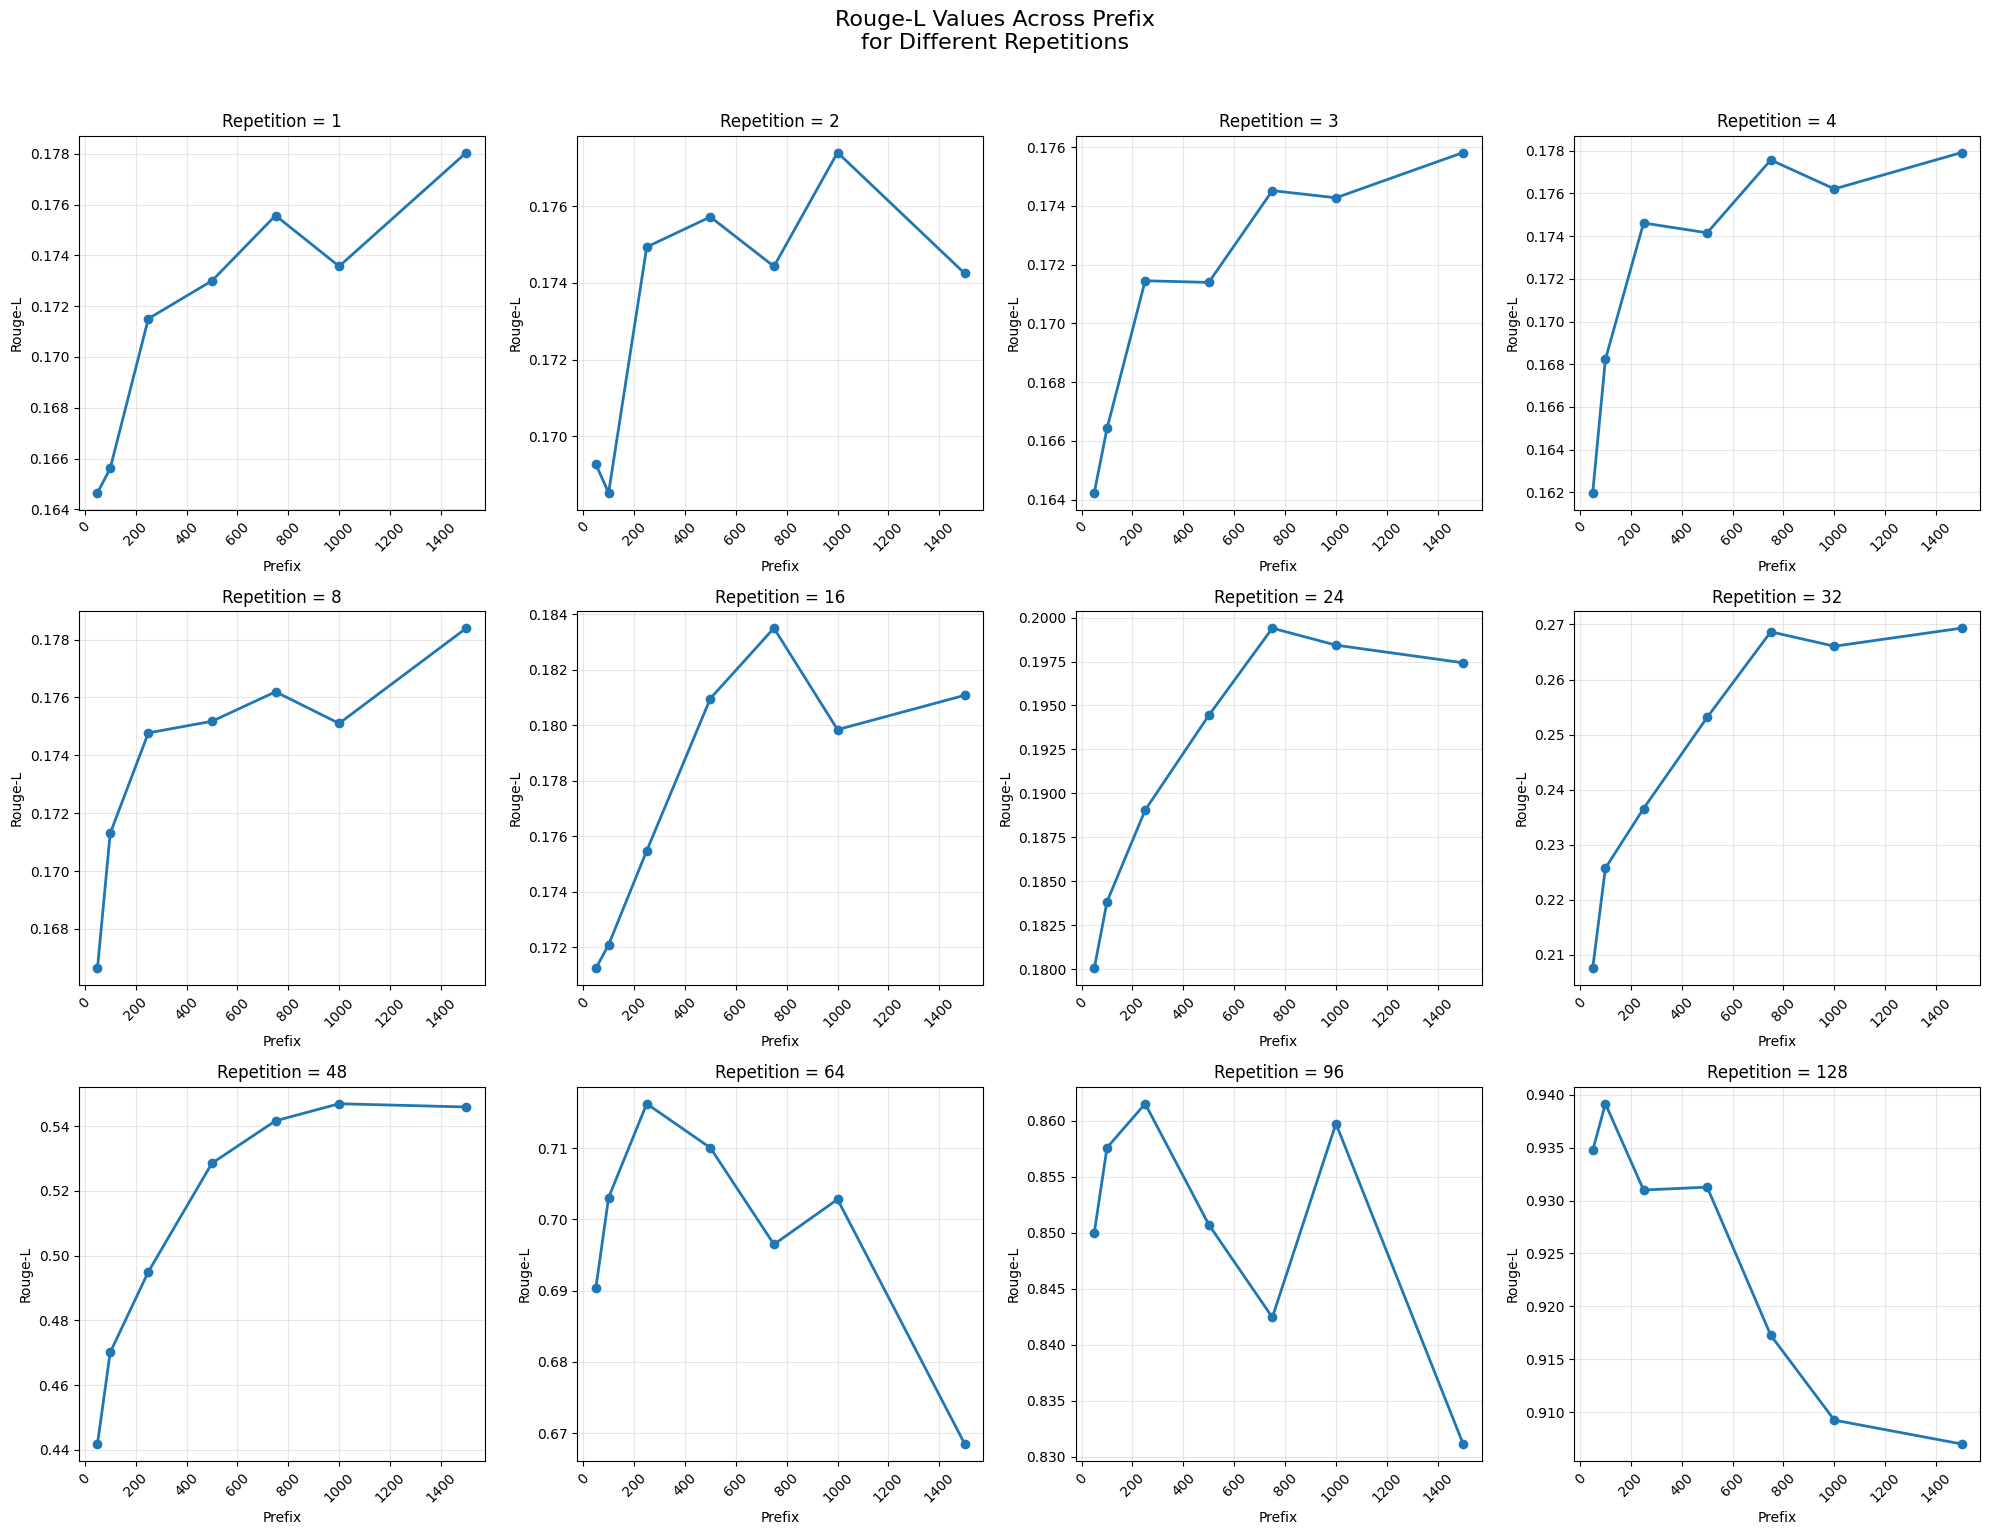

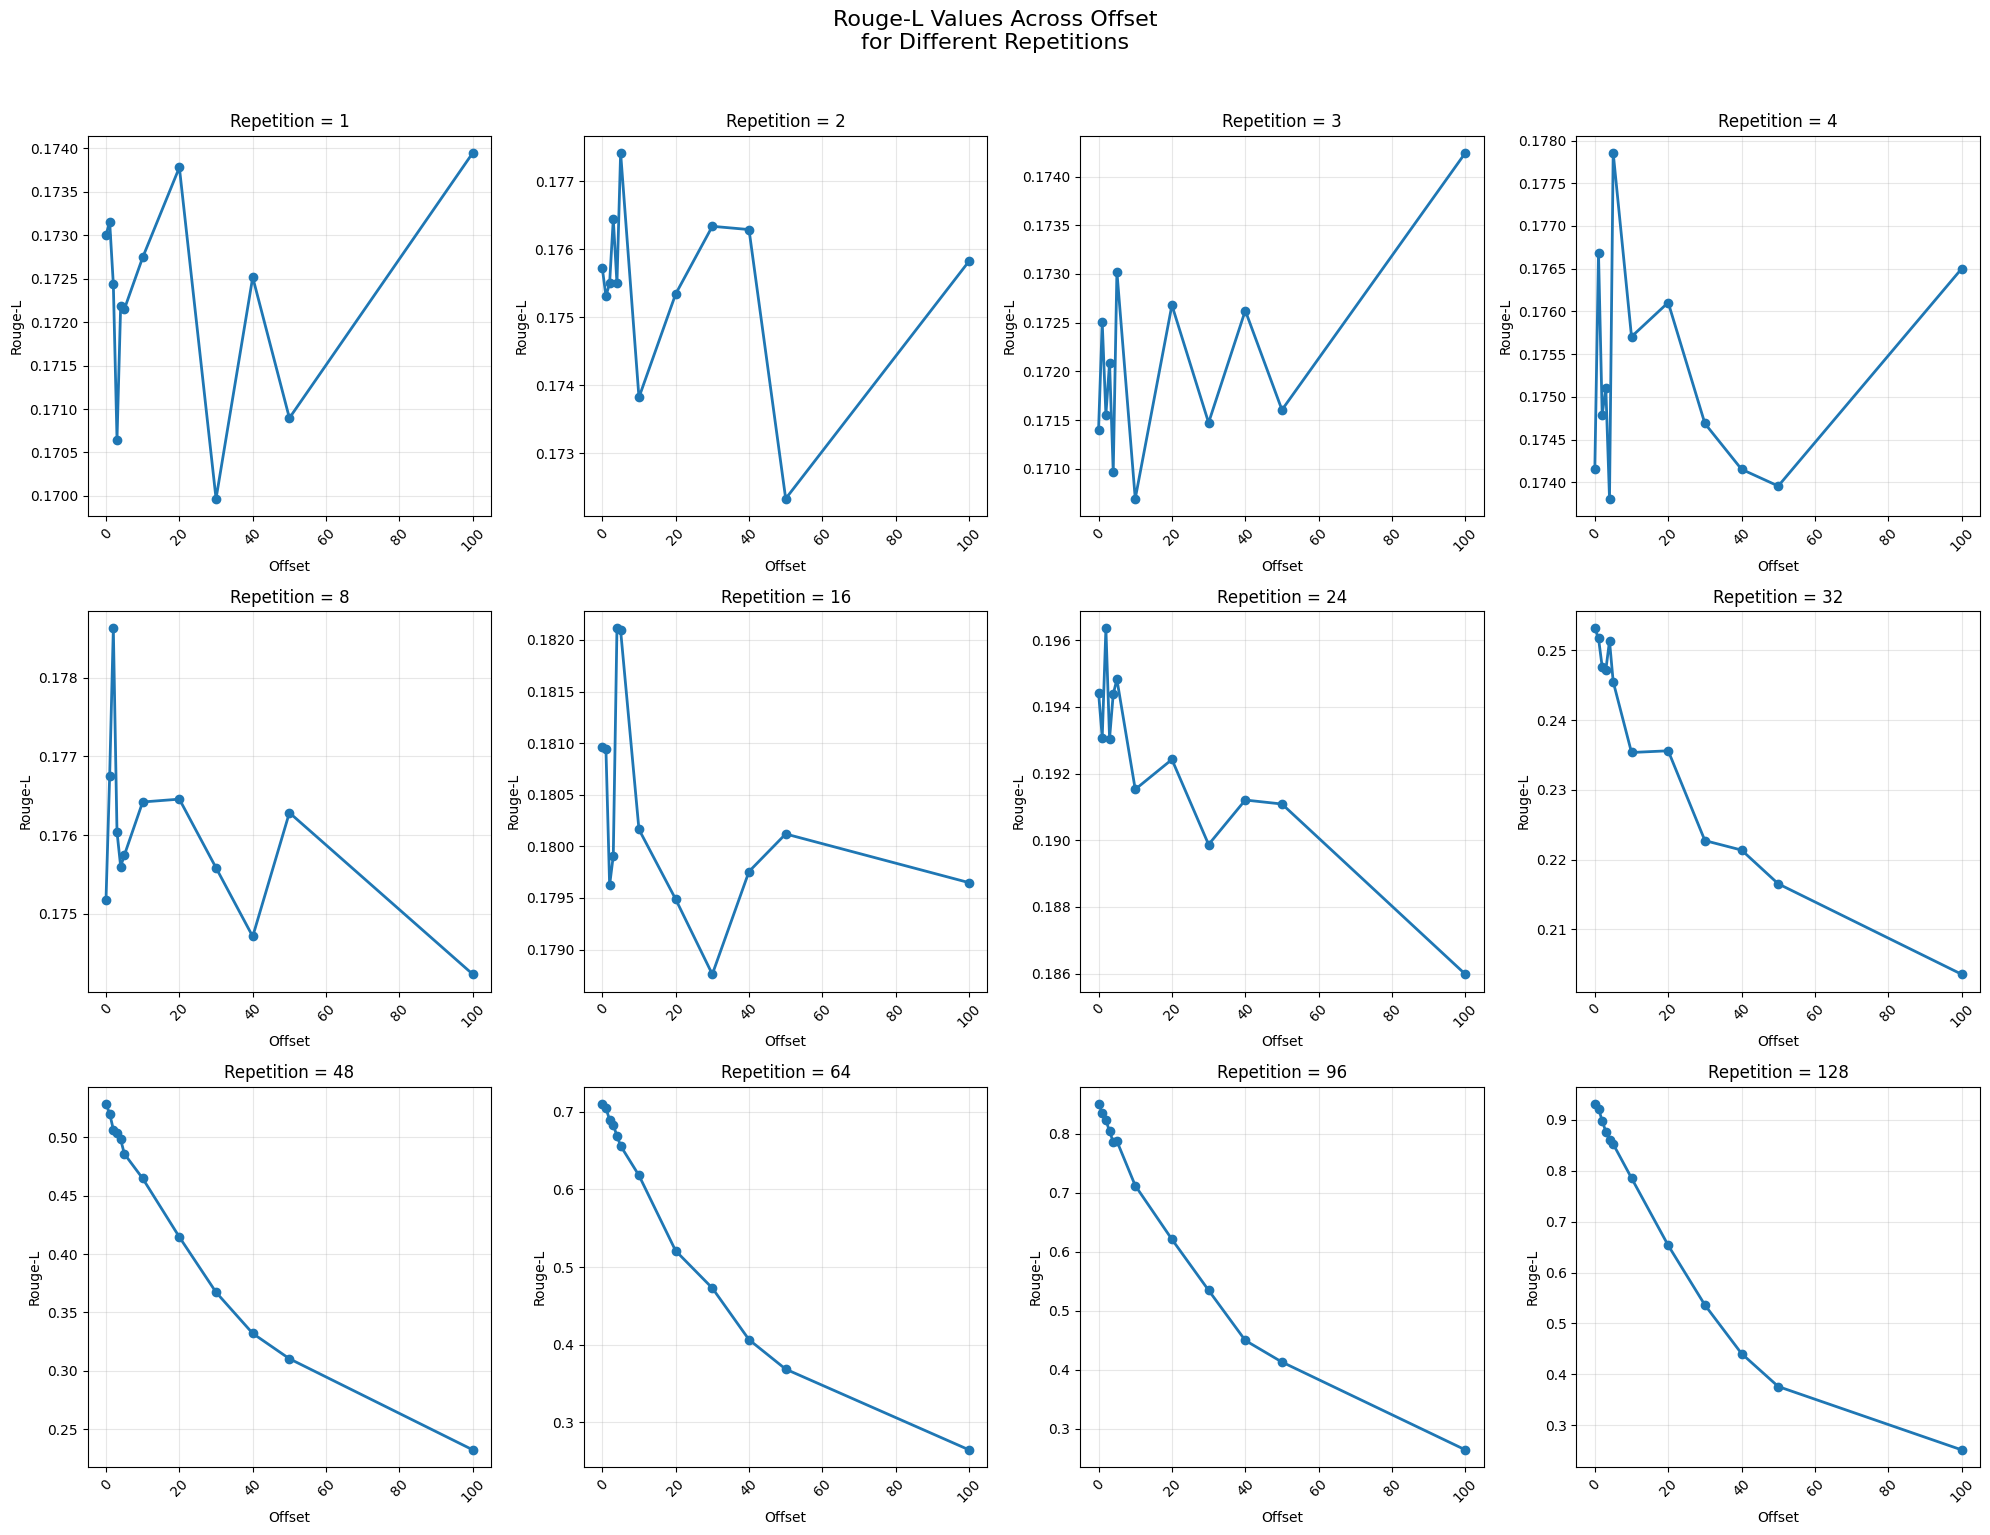

In [13]:
def plot_metric_by_repetition(df, vary_param='prefix', metric='Rouge-L', figsize=(20, 15)):
    """
    Create subplots showing metric values across prefix/offset for each repetition.
    
    Args:
        df: DataFrame from format_metric_df
        vary_param: 'prefix' or 'offset' indicating what parameter was varied
        metric: Name of the metric being plotted
        figsize: Tuple specifying figure size
    """
    import matplotlib.pyplot as plt
    
    # Get unique prefix/offset values and repetitions
    param_values = df.index.values
    repetitions = df.columns.values
    
    # Calculate number of rows and columns for subplots
    n_plots = len(repetitions)
    n_cols = 4  # You can adjust this
    n_rows = (n_plots + n_cols - 1) // n_cols
    
    # Create figure and subplots
    fig, axes = plt.subplots(n_rows, n_cols, figsize=figsize)
    fig.suptitle(f'{metric} Values Across {vary_param.title()}\nfor Different Repetitions', 
                 fontsize=16, y=1.02)
    
    # Flatten axes array for easier iteration
    axes_flat = axes.flatten()
    
    # Create plots
    for i, rep in enumerate(repetitions):
        ax = axes_flat[i]
        
        # Plot the data
        ax.plot(param_values, df[rep], marker='o', linewidth=2, markersize=6)
        
        # Set title and labels
        ax.set_title(f'Repetition = {rep}')
        ax.set_xlabel(f'{vary_param.title()}')
        ax.set_ylabel(metric)
        
        # Add grid
        ax.grid(True, alpha=0.3)
        
        # Rotate x-axis labels for better readability
        ax.tick_params(axis='x', rotation=45)
        
    # Remove any unused subplots
    for j in range(i + 1, len(axes_flat)):
        fig.delaxes(axes_flat[j])
    
    # Adjust layout to prevent overlap
    plt.tight_layout()
    return fig

# Example usage:
# For prefix length variation
df_prefix = format_metric_df(results_prefix, metric='Rouge-L', vary_param='prefix', stat='mean')
fig_prefix = plot_metric_by_repetition(df_prefix, vary_param='prefix')

# For offset variation
df_offset = format_metric_df(results_offset, metric='Rouge-L', vary_param='offset', stat='mean')
fig_offset = plot_metric_by_repetition(df_offset, vary_param='offset')

In [ ]:
print_metrics(results_prefix, metric='TTR_gen', vary_param='prefix') # , metric='Rouge-L'


=== Summary for Experiment: llama_1.5B_Sparse_Gutenberg_Standard_GBS_60_SEQ_10200350 ===

 === Summary for Repetition   1 ===
 Prefix Length  50
 TTR_gen    | Mean = 0.153, Std = 0.072
 Prefix Length 100
 TTR_gen    | Mean = 0.155, Std = 0.075
 Prefix Length 250
 TTR_gen    | Mean = 0.154, Std = 0.070
 Prefix Length 500
 TTR_gen    | Mean = 0.152, Std = 0.074
 Prefix Length 750
 TTR_gen    | Mean = 0.151, Std = 0.076
 Prefix Length 1000
 TTR_gen    | Mean = 0.145, Std = 0.077
 Prefix Length 1500
 TTR_gen    | Mean = 0.151, Std = 0.074

 === Summary for Repetition   2 ===
 Prefix Length  50
 TTR_gen    | Mean = 0.153, Std = 0.076
 Prefix Length 100
 TTR_gen    | Mean = 0.156, Std = 0.073
 Prefix Length 250
 TTR_gen    | Mean = 0.150, Std = 0.073
 Prefix Length 500
 TTR_gen    | Mean = 0.159, Std = 0.078
 Prefix Length 750
 TTR_gen    | Mean = 0.151, Std = 0.081
 Prefix Length 1000
 TTR_gen    | Mean = 0.149, Std = 0.079
 Prefix Length 1500
 TTR_gen    | Mean = 0.146, Std = 0.076

 === 

In [53]:
print_metrics(results_prefix, metric='NLL', vary_param='prefix') # , metric='Rouge-L'


=== Summary for Experiment: llama_1.5B_Sparse_Gutenberg_Standard_GBS_60_SEQ_10200350 ===

 === Summary for Repetition   1 ===
 Prefix Length  50
 NLL        | Mean = 0.498, Std = 0.322
 Prefix Length 100
 NLL        | Mean = 0.518, Std = 0.214
 Prefix Length 250
 NLL        | Mean = 0.543, Std = 0.228
 Prefix Length 500
 NLL        | Mean = 0.548, Std = 0.236
 Prefix Length 750
 NLL        | Mean = 0.556, Std = 0.242
 Prefix Length 1000
 NLL        | Mean = 0.543, Std = 0.246
 Prefix Length 1500
 NLL        | Mean = 0.565, Std = 0.249

 === Summary for Repetition   2 ===
 Prefix Length  50
 NLL        | Mean = 0.522, Std = 0.519
 Prefix Length 100
 NLL        | Mean = 0.524, Std = 0.208
 Prefix Length 250
 NLL        | Mean = 0.540, Std = 0.217
 Prefix Length 500
 NLL        | Mean = 0.572, Std = 0.246
 Prefix Length 750
 NLL        | Mean = 0.554, Std = 0.254
 Prefix Length 1000
 NLL        | Mean = 0.560, Std = 0.255
 Prefix Length 1500
 NLL        | Mean = 0.548, Std = 0.245

 === 

In [33]:
print_offset_metrics(res_offset, metric='Rouge-L') # , metric='Rouge-L'


=== Summary for Experiment: llama_1.5B_Sparse_Gutenberg_Standard_GBS_60_SEQ_10200350 ===

 === Summary for Repetition   1 ===
 Offset   0
 Rouge-L    | Mean = 0.173, Std = 0.041
 Offset   1
 Rouge-L    | Mean = 0.173, Std = 0.039
 Offset   2
 Rouge-L    | Mean = 0.172, Std = 0.040
 Offset   3
 Rouge-L    | Mean = 0.171, Std = 0.043
 Offset   4
 Rouge-L    | Mean = 0.172, Std = 0.039
 Offset   5
 Rouge-L    | Mean = 0.172, Std = 0.038
 Offset  10
 Rouge-L    | Mean = 0.173, Std = 0.042
 Offset  20
 Rouge-L    | Mean = 0.174, Std = 0.040
 Offset  30
 Rouge-L    | Mean = 0.170, Std = 0.043
 Offset  40
 Rouge-L    | Mean = 0.173, Std = 0.041
 Offset  50
 Rouge-L    | Mean = 0.171, Std = 0.042
 Offset 100
 Rouge-L    | Mean = 0.174, Std = 0.040

 === Summary for Repetition   2 ===
 Offset   0
 Rouge-L    | Mean = 0.176, Std = 0.051
 Offset   1
 Rouge-L    | Mean = 0.175, Std = 0.051
 Offset   2
 Rouge-L    | Mean = 0.175, Std = 0.052
 Offset   3
 Rouge-L    | Mean = 0.176, Std = 0.049
 Off

In [29]:
print_offset_metrics(res_offset, offset=10) # , metric='Rouge-L'


=== Summary for Experiment: llama_1.5B_Sparse_Gutenberg_Standard_GBS_60_SEQ_10200350 ===

 === Summary for Repetition   1 ===
 Offset  10
 NLL        | Mean = 0.552, Std = 0.226
 Rouge-L    | Mean = 0.173, Std = 0.042
 TTR_ref    | Mean = 0.535, Std = 0.047
 TTR_gen    | Mean = 0.151, Std = 0.070

 === Summary for Repetition   2 ===
 Offset  10
 NLL        | Mean = 0.544, Std = 0.228
 Rouge-L    | Mean = 0.174, Std = 0.053
 TTR_ref    | Mean = 0.540, Std = 0.053
 TTR_gen    | Mean = 0.154, Std = 0.076

 === Summary for Repetition   3 ===
 Offset  10
 NLL        | Mean = 0.544, Std = 0.239
 Rouge-L    | Mean = 0.171, Std = 0.044
 TTR_ref    | Mean = 0.539, Std = 0.045
 TTR_gen    | Mean = 0.151, Std = 0.080

 === Summary for Repetition   4 ===
 Offset  10
 NLL        | Mean = 0.578, Std = 0.462
 Rouge-L    | Mean = 0.176, Std = 0.051
 TTR_ref    | Mean = 0.539, Std = 0.048
 TTR_gen    | Mean = 0.156, Std = 0.076

 === Summary for Repetition   8 ===
 Offset  10
 NLL        | Mean = 0.58

In [30]:
print_offset_metrics(res_offset, offset=50) # , metric='Rouge-L'


=== Summary for Experiment: llama_1.5B_Sparse_Gutenberg_Standard_GBS_60_SEQ_10200350 ===

 === Summary for Repetition   1 ===
 Offset  50
 NLL        | Mean = 0.545, Std = 0.245
 Rouge-L    | Mean = 0.171, Std = 0.042
 TTR_ref    | Mean = 0.536, Std = 0.047
 TTR_gen    | Mean = 0.150, Std = 0.075

 === Summary for Repetition   2 ===
 Offset  50
 NLL        | Mean = 0.549, Std = 0.245
 Rouge-L    | Mean = 0.172, Std = 0.052
 TTR_ref    | Mean = 0.539, Std = 0.052
 TTR_gen    | Mean = 0.152, Std = 0.078

 === Summary for Repetition   3 ===
 Offset  50
 NLL        | Mean = 0.568, Std = 0.245
 Rouge-L    | Mean = 0.172, Std = 0.041
 TTR_ref    | Mean = 0.539, Std = 0.044
 TTR_gen    | Mean = 0.157, Std = 0.076

 === Summary for Repetition   4 ===
 Offset  50
 NLL        | Mean = 0.535, Std = 0.231
 Rouge-L    | Mean = 0.174, Std = 0.050
 TTR_ref    | Mean = 0.539, Std = 0.047
 TTR_gen    | Mean = 0.148, Std = 0.070

 === Summary for Repetition   8 ===
 Offset  50
 NLL        | Mean = 0.57

In [13]:
res_offset

{'llama_1.5B_Sparse_Gutenberg_Standard_GBS_60_SEQ_11971350': {0: {'offset_0': {'NLL': {'scores': [0.5495587587356567,
      0.4574504494667053,
      0.4568340480327606,
      0.40128093957901,
      0.49450594186782837,
      0.4810076653957367,
      0.41608482599258423,
      0.42012789845466614,
      0.48654600977897644,
      0.41784998774528503,
      0.47767364978790283,
      0.48277223110198975,
      0.433470755815506,
      0.5026480555534363,
      0.4768421947956085,
      0.5423244833946228,
      0.48848995566368103,
      0.39434173703193665,
      0.5140973329544067,
      0.48543044924736023,
      0.3723045885562897,
      0.3923271596431732,
      0.44821450114250183,
      0.4596765637397766,
      0.4463653266429901,
      0.5607928037643433,
      0.4332295358181,
      0.4882352650165558,
      0.4311051070690155,
      0.5300316214561462,
      0.5243887901306152,
      0.4348601996898651,
      0.4556281566619873,
      0.46503451466560364,
      0.4322476387

In [19]:
np.log2(128)

7.0

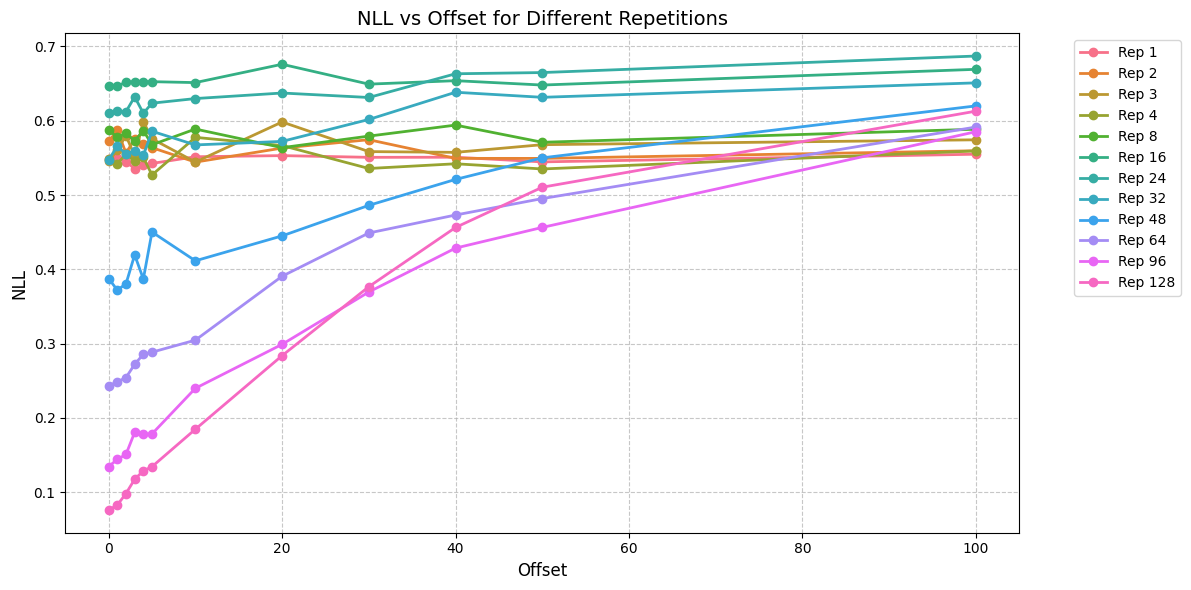

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

def plot_metrics(df, metric_name, vary_param='offset', show_ci=True, figsize=(12, 6)):
    """
    Plot metrics with optional error bars for different repetitions.
    Args:
        df: DataFrame from format_metric_df
        metric_name: Name of the metric (e.g., 'Rouge-L')
        vary_param: 'offset' or 'prefix' indicating what parameter is varied
        show_ci: If True, show confidence intervals using standard deviation
        figsize: Tuple for figure size
    """
    plt.figure(figsize=figsize)
    
    # Get all repetitions
    if isinstance(df.columns, pd.MultiIndex):
        repetitions = df.columns.get_level_values('repetition').unique()
    else:
        repetitions = df.columns  # For single stat DataFrames
        
    colors = sns.color_palette('husl', n_colors=len(repetitions))
    
    # Plot each repetition
    for rep, color in zip(repetitions, colors):
        if isinstance(df.columns, pd.MultiIndex):
            means = df[(rep, 'mean')]
            stds = df[(rep, 'std')] if show_ci else None
        else:
            means = df[rep]
            stds = None
        
        if show_ci and stds is not None:
            plt.errorbar(df.index, means, 
                        yerr=stds,
                        label=f'Rep {rep}',
                        color=color,
                        marker='o',
                        markersize=6,
                        linewidth=2,
                        capsize=4,
                        capthick=1,
                        elinewidth=1)
        else:
            plt.plot(df.index, means,
                    label=f'Rep {rep}',
                    color=color,
                    marker='o',
                    markersize=6,
                    linewidth=2)
    
    param_name = 'Prefix Length' if vary_param == 'prefix' else 'Offset'
    plt.xlabel(param_name, fontsize=12)
    plt.ylabel(f'{metric_name}', fontsize=12)
    plt.title(f'{metric_name} vs {param_name} for Different Repetitions', fontsize=14)
    plt.grid(True, linestyle='--', alpha=0.7)
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.tight_layout()
    
    return plt

# Without confidence intervals and single stat
df_offset_mean = format_metric_df(results_offset, metric='NLL', vary_param='offset', stat='mean')
plot_metrics(df_offset_mean, 'NLL', vary_param='offset', show_ci=False)
plt.show()

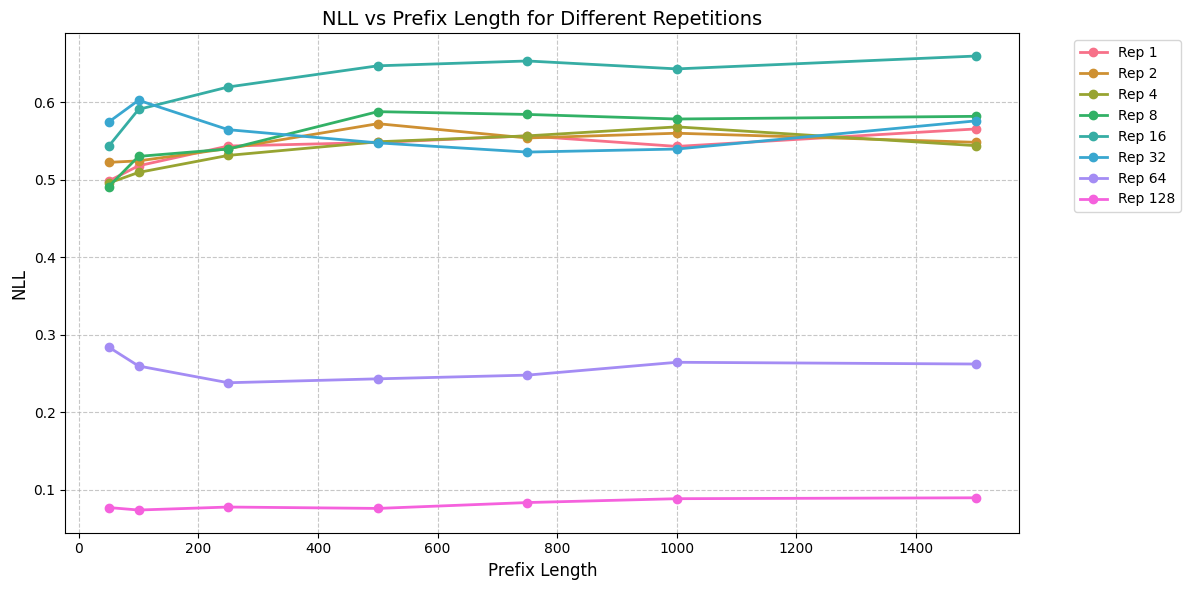

In [24]:
# Without confidence intervals and single stat
df_prefix_mean = format_metric_df(results_prefix, metric='NLL', vary_param='prefix', stat='mean')
plot_metrics(df_prefix_mean[2**np.arange(8)], 'NLL', vary_param='prefix', show_ci=False)
plt.show()

In [22]:
goldfish_res_greedy = eval_rouge_ttr(
    base_path, 
    experiments=[
        # "llama_1.5B_Sparse_Gutenberg_Standard_GBS_60",
        # "llama_1.5B_Sparse_Gutenberg_K_50_H_13_GBS_60",
        # "llama_1.5B_Sparse_Gutenberg_K_50_H_13_GBS_60_SEQ_1984000",
        # "llama_1.5B_Sparse_Gutenberg_Standard_GBS_60_SEQ_1984000",
        # "llama_1.5B_Sparse_Gutenberg_Standard_GBS_60_SEQ_2023680",
        # "llama_1.5B_Sparse_Gutenberg_Standard_GBS_60_SEQ_3968000",
        # "llama_1.5B_Sparse_Gutenberg_K_50_H_13_GBS_60_SEQ_3968000",
        # "llama_1.5B_Sparse_Gutenberg_Standard_GBS_60_SEQ_7936000",
        # "llama_1.5B_Sparse_Gutenberg_Standard_GBS_60_SEQ_2380800",
        "llama_1.5B_Sparse_Gutenberg_K_50_H_50_GBS_60_SEQ_11971350",
        "llama_1.5B_Sparse_Gutenberg_K_50_H_13_GBS_60_SEQ_11971350",
        "llama_1.5B_Sparse_Gutenberg_Standard_GBS_60_SEQ_11971350"
    ], 
    repetitions=repetitions,
    len_suffix=500,
    policy='greedy'
)

Processing repetition set 0:   0%|          | 0/6 [00:00<?, ?it/s]

Processing repetition set 2048: 100%|██████████| 6/6 [00:01<00:00,  4.09it/s]
Generating train split: 500 examples [00:00, 12843.98 examples/s]]
Calculating metrics for rep=0 (num_proc=50): 100%|██████████| 500/500 [00:00<00:00, 612.42 examples/s]
Generating train split: 500 examples [00:00, 13543.64 examples/s]  1.35s/it]
Calculating metrics for rep=128 (num_proc=50): 100%|██████████| 500/500 [00:00<00:00, 626.89 examples/s]
Generating train split: 500 examples [00:00, 14169.08 examples/s]  1.37s/it]
Calculating metrics for rep=256 (num_proc=50): 100%|██████████| 500/500 [00:00<00:00, 622.76 examples/s]
Generating train split: 500 examples [00:00, 14036.79 examples/s]  1.34s/it]
Calculating metrics for rep=512 (num_proc=50): 100%|██████████| 500/500 [00:01<00:00, 494.97 examples/s]
Generating train split: 500 examples [00:00, 14012.31 examples/s],  1.41s/it]
Calculating metrics for rep=1024 (num_proc=50): 100%|██████████| 500/500 [00:01<00:00, 484.81 examples/s]
Generating train split

In [23]:
log_metrics(
    goldfish_res_greedy
)


=== Summary for Experiment: llama_1.5B_Sparse_Gutenberg_K_50_H_50_GBS_60_SEQ_11971350 ===
  Repetition   0
    NLL        | Mean = 0.460, Std = 0.071
    Rouge-L    | Mean = 0.159, Std = 0.022
    TTR_ref    | Mean = 0.541, Std = 0.050
    TTR_gen    | Mean = 0.558, Std = 0.036
  Repetition 128
    NLL        | Mean = 0.450, Std = 0.069
    Rouge-L    | Mean = 0.180, Std = 0.046
    TTR_ref    | Mean = 0.540, Std = 0.057
    TTR_gen    | Mean = 0.551, Std = 0.058
  Repetition 256
    NLL        | Mean = 0.447, Std = 0.066
    Rouge-L    | Mean = 0.182, Std = 0.045
    TTR_ref    | Mean = 0.539, Std = 0.052
    TTR_gen    | Mean = 0.553, Std = 0.046
  Repetition 512
    NLL        | Mean = 0.438, Std = 0.068
    Rouge-L    | Mean = 0.183, Std = 0.045
    TTR_ref    | Mean = 0.539, Std = 0.045
    TTR_gen    | Mean = 0.554, Std = 0.040
  Repetition 1024
    NLL        | Mean = 0.433, Std = 0.061
    Rouge-L    | Mean = 0.187, Std = 0.052
    TTR_ref    | Mean = 0.539, Std = 0.046
    TT

/users/xyixuan/miniconda3/lib/python3.12/site-packages/seaborn/axisgrid.py:123: UserWarning: Tight layout not applied. tight_layout cannot make Axes height small enough to accommodate all Axes decorations.
  self._figure.tight_layout(*args, **kwargs)
/users/xyixuan/miniconda3/lib/python3.12/site-packages/seaborn/axisgrid.py:854: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  func(*plot_args, **plot_kwargs)
/users/xyixuan/miniconda3/lib/python3.12/site-packages/seaborn/axisgrid.py:854: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  func(*plot_args, **plot_kwargs)
/users/xyixuan/miniconda3/lib/python3.12/site-packages/seaborn/axisgrid.py:854: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  func(*plot_args, **plot_kwargs)
/users/xyixuan/miniconda3/lib/python3.12/site-packages/seab

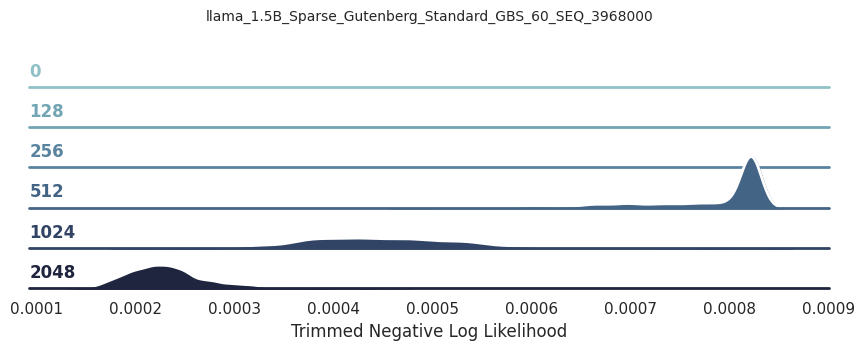

In [18]:
from src.vis.distributions import plot_nll_distributions_ridge

plot_nll_distributions_ridge(
    results_dict=goldfish_res_greedy,
    model_key="llama_1.5B_Sparse_Gutenberg_Standard_GBS_60_SEQ_3968000",
    upper_quantile=0.4,
)

/users/xyixuan/miniconda3/lib/python3.12/site-packages/seaborn/axisgrid.py:123: UserWarning: Tight layout not applied. tight_layout cannot make Axes height small enough to accommodate all Axes decorations.
  self._figure.tight_layout(*args, **kwargs)
/users/xyixuan/miniconda3/lib/python3.12/site-packages/seaborn/axisgrid.py:123: UserWarning: Tight layout not applied. tight_layout cannot make Axes height small enough to accommodate all Axes decorations.
  self._figure.tight_layout(*args, **kwargs)
/users/xyixuan/miniconda3/lib/python3.12/site-packages/seaborn/axisgrid.py:123: UserWarning: Tight layout not applied. tight_layout cannot make Axes height small enough to accommodate all Axes decorations.
  self._figure.tight_layout(*args, **kwargs)
/users/xyixuan/miniconda3/lib/python3.12/site-packages/seaborn/axisgrid.py:123: UserWarning: Tight layout not applied. tight_layout cannot make Axes height small enough to accommodate all Axes decorations.
  self._figure.tight_layout(*args, **kwar

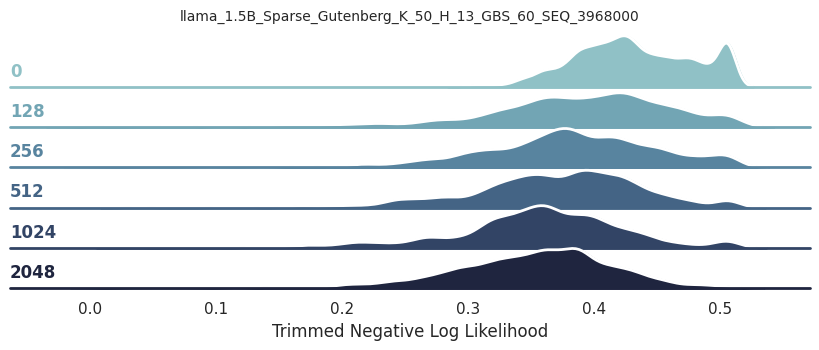

In [17]:
from src.vis.distributions import plot_nll_distributions_ridge

plot_nll_distributions_ridge(
    results_dict=goldfish_res_greedy,
    model_key="llama_1.5B_Sparse_Gutenberg_K_50_H_13_GBS_60_SEQ_3968000",
    upper_quantile=0.96,
)

In [15]:
log_metric(
    results=goldfish_res_greedy,
    metric='TTR_gen',
)


=== Repetition 0 TTR_gen ===
  llama_1.5B_Sparse_Gutenberg_K_50_H_13_GBS_60_SEQ_3968000  : Mean = 0.558 | Std = 0.034
  llama_1.5B_Sparse_Gutenberg_Standard_GBS_60_SEQ_3968000   : Mean = 0.556 | Std = 0.043

=== Repetition 128 TTR_gen ===
  llama_1.5B_Sparse_Gutenberg_K_50_H_13_GBS_60_SEQ_3968000  : Mean = 0.554 | Std = 0.049
  llama_1.5B_Sparse_Gutenberg_Standard_GBS_60_SEQ_3968000   : Mean = 0.541 | Std = 0.055

=== Repetition 256 TTR_gen ===
  llama_1.5B_Sparse_Gutenberg_K_50_H_13_GBS_60_SEQ_3968000  : Mean = 0.553 | Std = 0.044
  llama_1.5B_Sparse_Gutenberg_Standard_GBS_60_SEQ_3968000   : Mean = 0.541 | Std = 0.053

=== Repetition 512 TTR_gen ===
  llama_1.5B_Sparse_Gutenberg_K_50_H_13_GBS_60_SEQ_3968000  : Mean = 0.555 | Std = 0.035
  llama_1.5B_Sparse_Gutenberg_Standard_GBS_60_SEQ_3968000   : Mean = 0.539 | Std = 0.045

=== Repetition 1024 TTR_gen ===
  llama_1.5B_Sparse_Gutenberg_K_50_H_13_GBS_60_SEQ_3968000  : Mean = 0.551 | Std = 0.044
  llama_1.5B_Sparse_Gutenberg_Standard_G

In [23]:
from src.vis.correlations import plot_spearman_correlation, plot_pearson_correlation

Pearson Correlation Tests between NLL and TTR_gen:

Repetition 0:
r = 0.6095
p-value = 0.0000

Repetition 128:
r = 0.0361
p-value = 0.4202

Repetition 256:
r = 0.0127
p-value = 0.7775

Repetition 512:
r = 0.0678
p-value = 0.1300

Repetition 1024:
r = 0.1346
p-value = 0.0026

Repetition 2048:
r = 0.1836
p-value = 0.0000


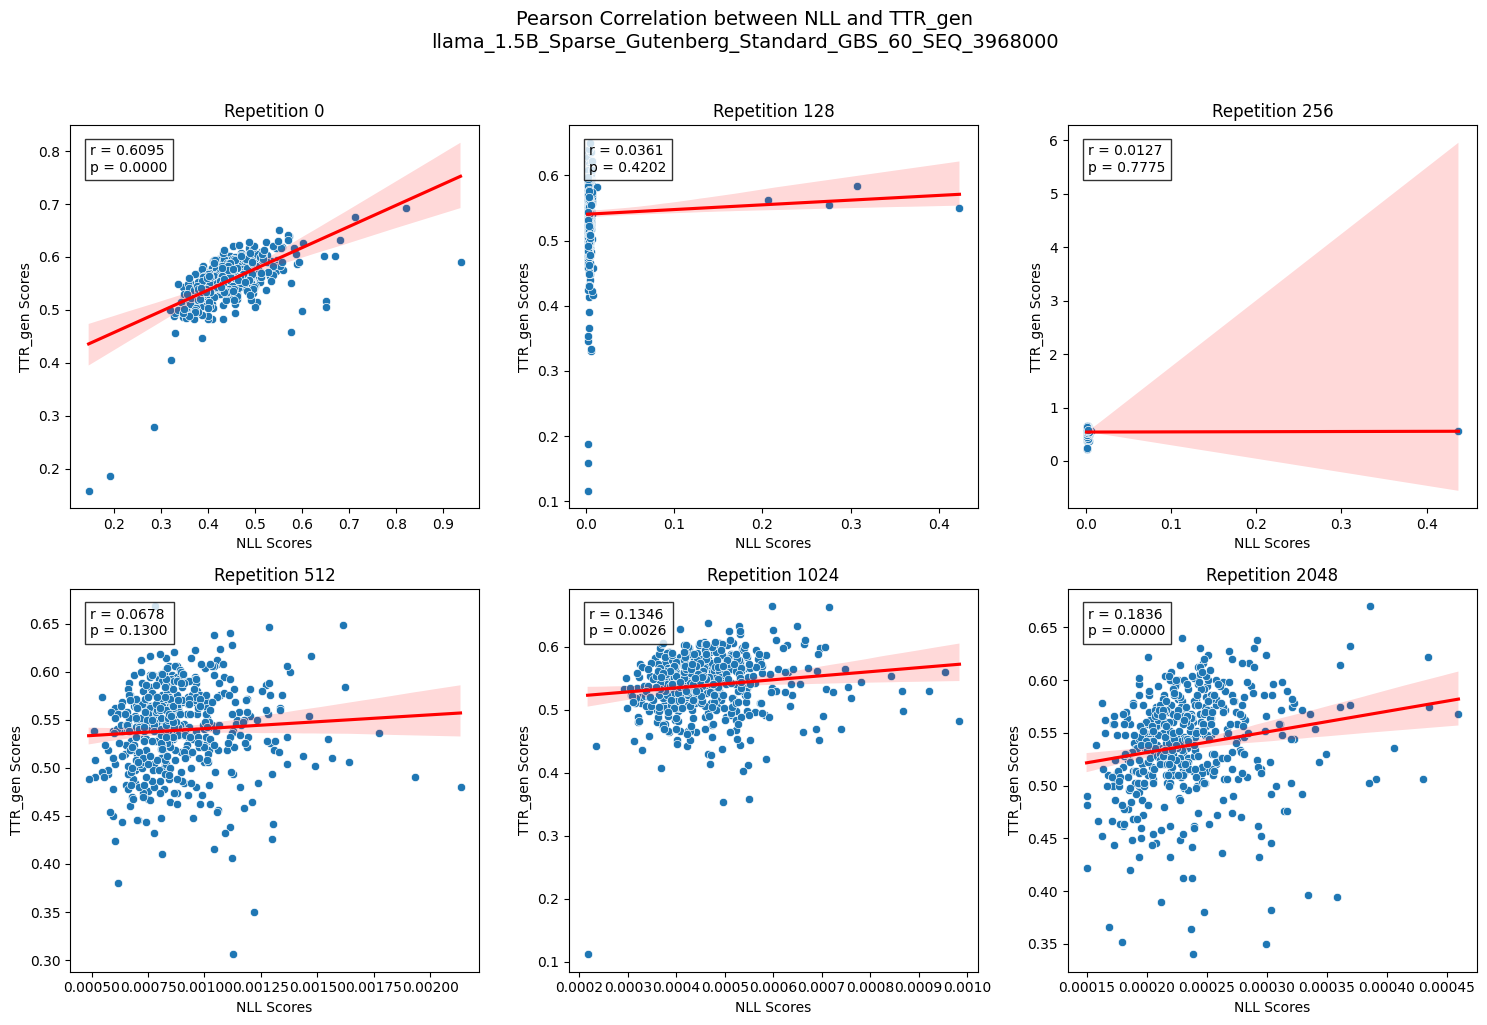

In [24]:
plot_pearson_correlation(
    result=goldfish_res_greedy,
    expr='llama_1.5B_Sparse_Gutenberg_Standard_GBS_60_SEQ_3968000',
    metric1='NLL',
    metric2='TTR_gen',
)

Spearman Correlation Tests between NLL and TTR_gen:

Repetition 0:
rho = 0.6054
p-value = 0.0000

Repetition 128:
rho = 0.1320
p-value = 0.0031

Repetition 256:
rho = 0.1144
p-value = 0.0105

Repetition 512:
rho = 0.1361
p-value = 0.0023

Repetition 1024:
rho = 0.1594
p-value = 0.0003

Repetition 2048:
rho = 0.2589
p-value = 0.0000


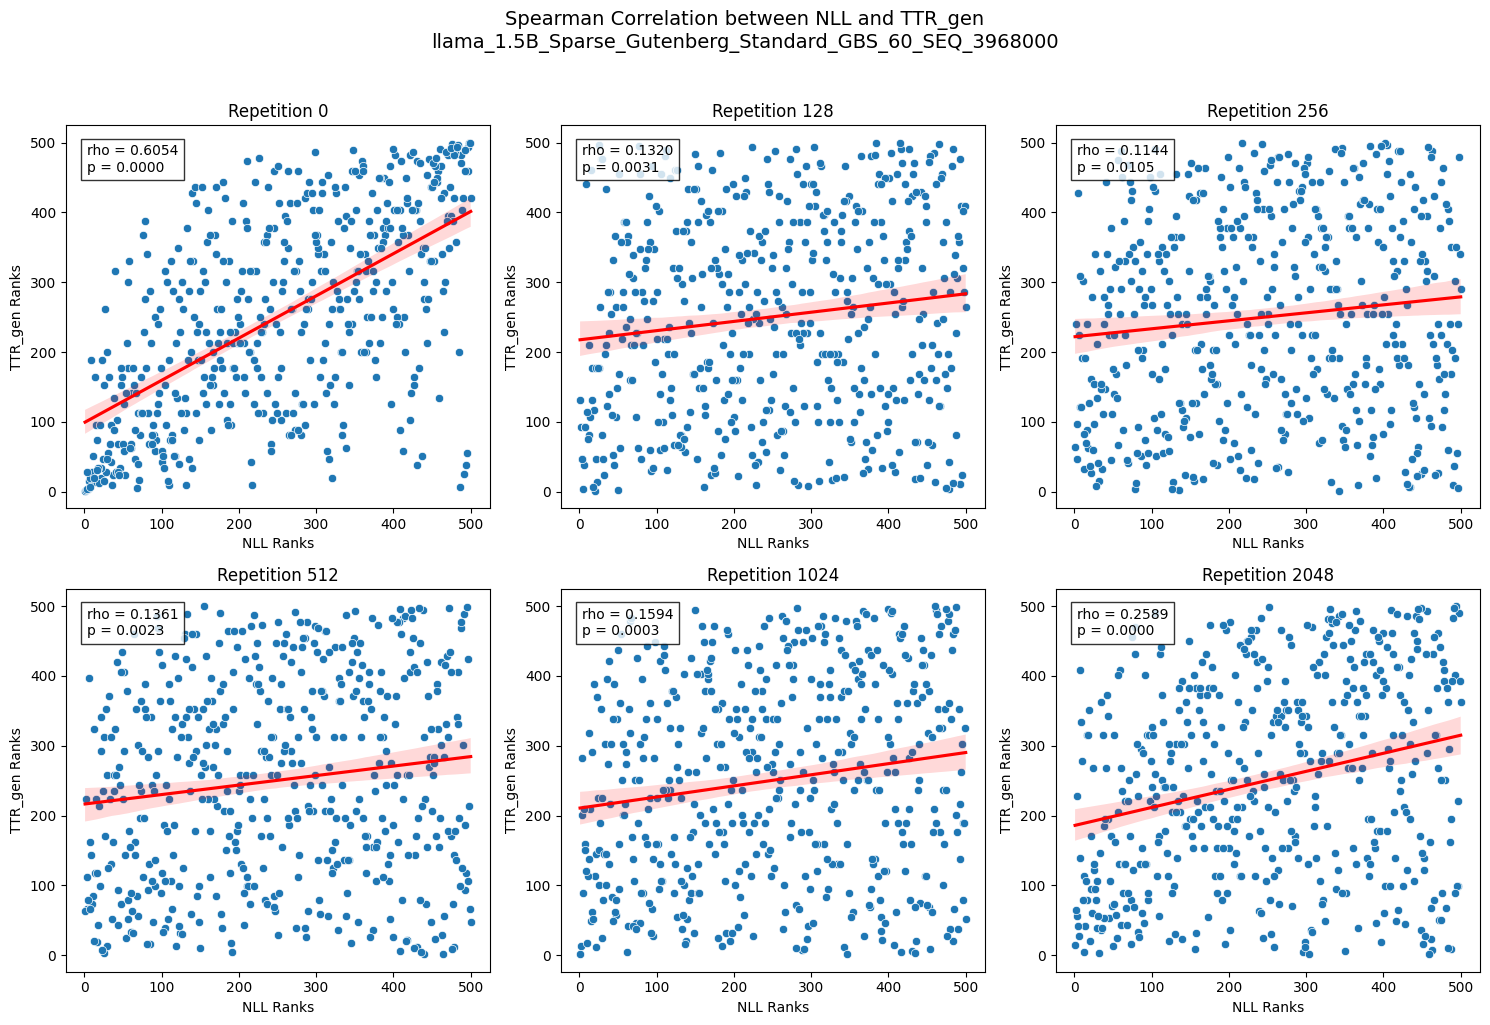

In [22]:
plot_spearman_correlation(
    result=goldfish_res_greedy,
    expr='llama_1.5B_Sparse_Gutenberg_Standard_GBS_60_SEQ_3968000',
    metric1='NLL',
    metric2='TTR_gen',
)

In [8]:
from src.verbatim_eval.utils import find_top_quantile_indices

In [11]:
find_top_quantile_indices(
    metric_1_scores=goldfish_res_greedy['llama_1.5B_Sparse_Gutenberg_Standard_GBS_60_SEQ_11971350'][128]['Rouge-L']['scores'],
    metric_2_scores=goldfish_res_greedy['llama_1.5B_Sparse_Gutenberg_Standard_GBS_60_SEQ_11971350'][128]['TTR_gen']['scores'],
    q=0.2,
)

[146, 177, 220, 244, 319, 346, 380, 444, 467]

In [14]:
goldfish_res_greedy['llama_1.5B_Sparse_Gutenberg_Standard_GBS_60_SEQ_11971350'][128]['Rouge-L']['scores']

array([0.166, 0.154, 0.17 , 0.326, 0.188, 0.172, 0.16 , 0.178, 0.194,
       0.154, 0.194, 0.166, 0.186, 0.652, 0.16 , 0.202, 0.298, 0.16 ,
       0.162, 0.198, 0.218, 0.18 , 0.208, 0.194, 0.182, 0.168, 0.194,
       0.22 , 0.166, 0.178, 0.16 , 0.162, 0.194, 0.226, 0.128, 0.168,
       0.182, 0.178, 0.166, 0.202, 0.204, 0.172, 0.152, 0.186, 0.142,
       0.164, 0.172, 0.218, 0.178, 0.152, 0.168, 0.148, 0.194, 0.146,
       0.208, 0.146, 0.246, 0.158, 0.156, 0.16 , 0.196, 0.204, 0.174,
       0.166, 0.186, 0.2  , 0.162, 0.196, 0.21 , 0.17 , 0.142, 0.164,
       0.194, 0.19 , 0.156, 0.126, 0.134, 0.17 , 0.142, 0.168, 0.192,
       0.208, 0.154, 0.196, 0.17 , 0.186, 0.16 , 0.188, 0.246, 0.28 ,
       0.154, 0.16 , 0.158, 0.194, 0.164, 0.144, 0.158, 0.194, 0.186,
       0.216, 0.338, 0.164, 0.138, 0.162, 0.212, 0.166, 0.154, 0.176,
       0.172, 0.176, 0.154, 0.206, 0.166, 0.162, 0.184, 0.152, 0.146,
       0.174, 0.168, 0.182, 0.184, 0.196, 0.182, 0.192, 0.154, 0.192,
       0.15 , 0.184,

In [15]:
import matplotlib.pyplot as plt

def plot_ttr_dists(
    goldfish_res: dict,
    repetitions: list[int],
    metric: str,
):
    """
    Plot the distributions of TTR (Type-Token Ratio) scores for multiple repetitions.

    Parameters
    ----------
    expr : str
        An identifier or label for the experiment/model grouping.
    repetitions : list[int]
        A list of repetition indices (e.g., [1, 2, 3, 4]).
    goldfish_res : dict
        Nested dict of model evaluation results. For example:
            goldfish_res[model_name][rep]['TTR_gen']['scores'] = np.array(...)
            goldfish_res[model_name][rep]['TTR_ref']['scores'] = np.array(...)
    """
    n_reps = len(repetitions)
    
    # Decide on subplot arrangement: up to 3 columns, rows as needed
    n_cols = min(3, n_reps)  
    n_rows = (n_reps + n_cols - 1) // n_cols  # "ceiling" division

    # Create figure and subplots
    fig, axes = plt.subplots(n_rows, n_cols, figsize=(5 * n_cols, 4 * n_rows))
    fig.suptitle(f"{metric} Distributions")

    # If multiple rows, flatten axes to 1D for easy indexing
    if n_rows > 1:
        axes = axes.ravel()

    # Plot each repetition
    for idx, rep in enumerate(repetitions):
        # For example, we have two model outputs + reference:
        #   model1 = "llama_1.5B_Sparse_Gutenberg_Standard_GBS_60"
        #   model2 = "llama_1.5B_Sparse_Gutenberg_K_50_H_13_GBS_60"
        # We assume you want TTR_gen from both, and TTR_ref from the second.
        if metric == "TTR":
            # arr1 = goldfish_res["llama_1.5B_Sparse_Gutenberg_Standard_GBS_60"][rep]["TTR_gen"]["scores"]
            # arr2 = goldfish_res["llama_1.5B_Sparse_Gutenberg_K_50_H_13_GBS_60"][rep]["TTR_gen"]["scores"]
            # arr3 = goldfish_res["llama_1.5B_Sparse_Gutenberg_K_50_H_13_GBS_60"][rep]["TTR_ref"]["scores"]

            # ax = axes[idx]
            
            # # Plot histograms
            # ax.hist(arr1, bins=30, alpha=0.5, label='Standard TTR_gen')
            # ax.hist(arr2, bins=30, alpha=0.5, label='Goldfish TTR_gen')
            # ax.hist(arr3, bins=30, alpha=0.5, label='Reference TTR_ref')

            arr1 = goldfish_res["llama_1.5B_Sparse_Gutenberg_Standard_GBS_60_SEQ_11971350"][rep]["TTR_gen"]["scores"]
            arr2 = goldfish_res["llama_1.5B_Sparse_Gutenberg_Standard_GBS_60_SEQ_11971350"][rep]["TTR_ref"]["scores"]

            ax = axes[idx]
            
            # Plot histograms
            ax.hist(arr1, bins=30, alpha=0.5, label='Standard TTR_gen')
            ax.hist(arr2, bins=30, alpha=0.5, label='Reference TTR_ref')

            ax.set_xlabel("TTR Score")

        elif metric == "Rouge-L":
            # arr1 = goldfish_res["llama_1.5B_Sparse_Gutenberg_Standard_GBS_60"][rep]["Rouge-L"]["scores"]
            # arr2 = goldfish_res["llama_1.5B_Sparse_Gutenberg_K_50_H_13_GBS_60"][rep]["Rouge-L"]["scores"]

            # ax = axes[idx]
            
            # # Plot histograms
            # ax.hist(arr1, bins=30, alpha=0.5, label='Standard Rouge-L')
            # ax.hist(arr2, bins=30, alpha=0.5, label='Goldfish Rouge-L')

            arr1 = goldfish_res["llama_1.5B_Sparse_Gutenberg_Standard_GBS_60_SEQ_11971350"][rep]["Rouge-L"]["scores"]
            ax = axes[idx]
            ax.hist(arr1, bins=30, alpha=0.5, label='Standard Rouge-L')

            ax.set_xlabel("Rouge-L Score")
            ax.set_xlim(0, 1)  # Set y-axis limit to 500
            ax.set_yscale('log')

        else:
            raise ValueError(f"Unknown metric: {metric}, available options: 'TTR', 'Rouge-L'")

        ax.set_ylabel("Frequency")
        ax.set_title(f"Rep {rep}")
        ax.legend()
        ax.grid(axis='y', alpha=0.75)
        # Example of setting log scale on Y-axis:
        # ax.set_yscale('log')

    # Remove any unused subplots (e.g., if n_reps < n_rows*n_cols)
    for idx in range(n_reps, n_rows * n_cols):
        fig.delaxes(axes[idx])

    plt.tight_layout()
    plt.show()


In [18]:
plot_ttr_dists(goldfish_res_greedy, repetitions_2048, metric='TTR')

NameError: name 'plot_ttr_dists' is not defined

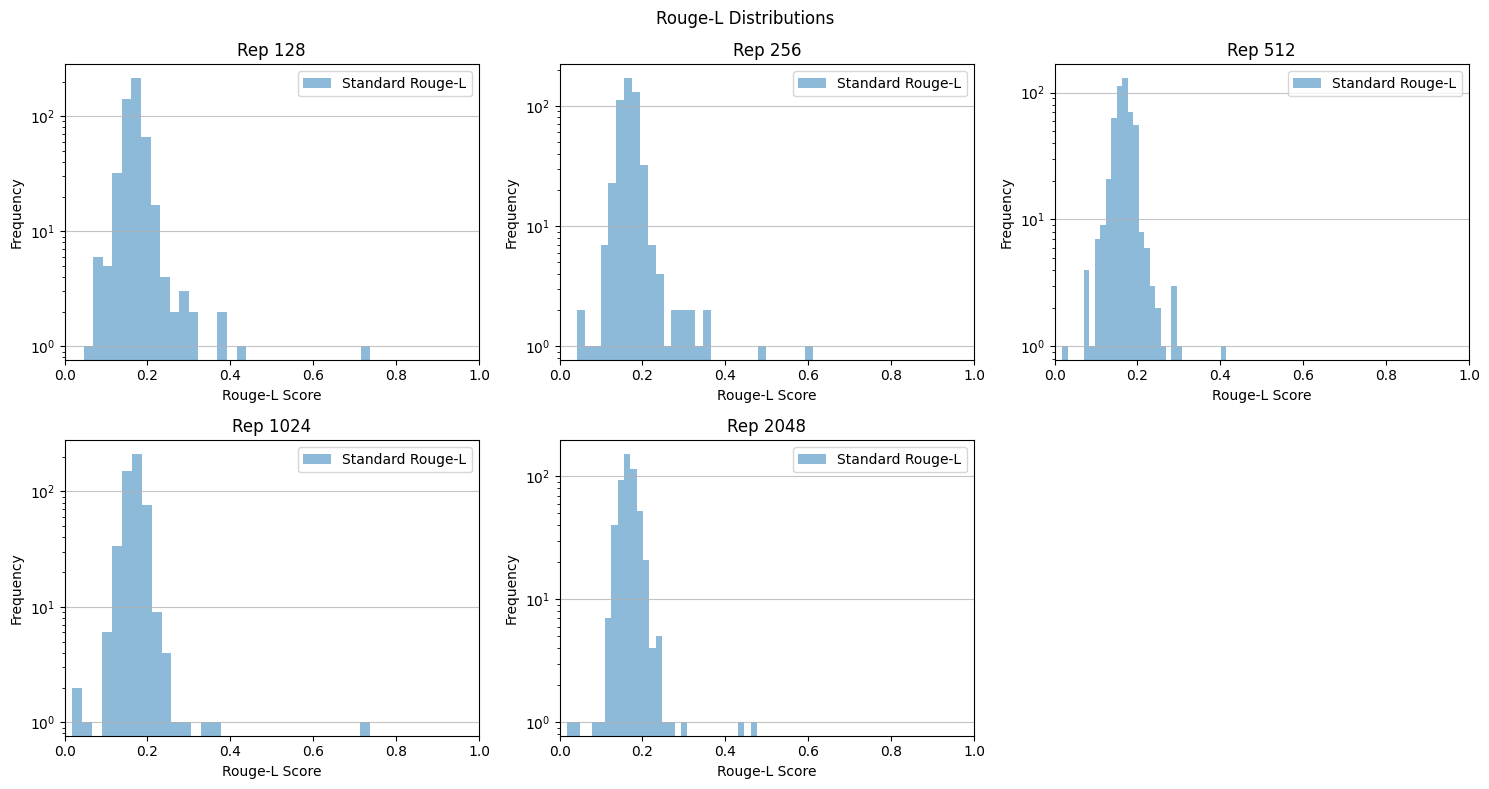

In [20]:
plot_ttr_dists(goldfish_res, repetitions_2048, metric='Rouge-L')

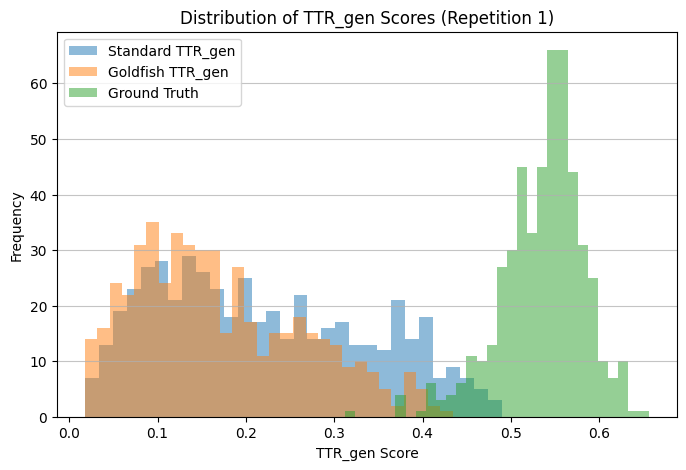

In [179]:
import matplotlib.pyplot as plt
import numpy as np

rep = 1
# Extract the scores
arr1 = goldfish_res['llama_1.5B_Sparse_Gutenberg_Standard_GBS_60'][rep]['TTR_gen']['scores']
arr2 = goldfish_res['llama_1.5B_Sparse_Gutenberg_K_50_H_13_GBS_60'][rep]['TTR_gen']['scores']
arr3 = goldfish_res['llama_1.5B_Sparse_Gutenberg_K_50_H_13_GBS_60'][rep]['TTR_ref']['scores']

# Plot histograms
plt.figure(figsize=(8, 5))
plt.hist(arr1, bins=30, alpha=0.5, label='Standard TTR_gen')
plt.hist(arr2, bins=30, alpha=0.5, label='Goldfish TTR_gen')
plt.hist(arr3, bins=30, alpha=0.5, label='Ground Truth')

plt.title(f"Distribution of TTR_gen Scores (Repetition {rep})")
plt.xlabel("TTR_gen Score")
plt.ylabel("Frequency")
plt.legend()
plt.grid(axis='y', alpha=0.75)
plt.show()
